In [85]:
import os
os.chdir('/home/ubuntu/code/pump_post_midterm/pump')

In [86]:
# # Get test_q_keys
# import random
# import pandas as pd
# from src.utils import get_file_from_s3

# survey_name = "American_Trends_Panel_W32"
# random.seed(42)
# survey_df = pd.read_csv(get_file_from_s3(f"human_resp/{survey_name}/info.csv"))
# q_keys = list(survey_df['key'])
# test_q_keys = random.choices(q_keys, k=5)

# print(test_q_keys)

import random
random.seed(42)

test_q_keys_mapping = {
    "American_Trends_Panel_W26": ['GUNRESPNOKIDSB_W26', 'WORLDDANGER_W26', 'GUNIDENTITY_W26', 'REASONGUNC_W26', 'GUNRESPKIDSC_W26'],
    "American_Trends_Panel_W27": ['CAREGIV3A_W27', 'PREDICTA_W27', 'WORK3C_W27', 'CARS10D_W27', 'CAREGIV7_W27'],
    "American_Trends_Panel_W32": ['NEIGHINTERB_W32', 'SATLIFEC_W32', 'SUCCESSIMPA_W32', 'COMMIMPE_W32', 'GROWUPUSR_W32']
}


# Hyper parameters

In [87]:
# survey_name = "American_Trends_Panel_W26"

# def skip_exp(filename):
#     if all(_ not in filename for _ in ['v11', 'v10']): return True
#     if any(_ in filename for _ in ['hcbdeu', 'hcaic']): return True
#     if ('v11' in filename) and ('persona' not in filename): return True
#     return False

# def get_exp(filename):
#     if filename[-5:] == '.json': filename = filename[:-5]
#     exp_elements = [_ for _ in filename.split('_') if _ in ['history', 'demo', 'persona', 'v10', 'v11', 'v12', 'hcaic', 'hcbds', 'hcbdeu']]
#     final = '_'.join(exp_elements)
#     # print(filename, '->', final)
#     return final


In [88]:

# survey_name = "American_Trends_Panel_W27"

# def skip_exp(filename):
#     if 'pval' in filename: return True
#     return False

# def get_exp(filename):
#     if filename[-5:] == '.json': filename = filename[:-5]
#     exp_elements = [_ for _ in filename.split('_') if _ in ['history', 'demo', 'persona', 'pval']]
#     final = '_'.join(exp_elements)
#     # print(filename, '->', final)
#     return final

In [89]:

survey_name = "American_Trends_Panel_W32"

def skip_exp(filename):
    # if 'pval' in filename: return True
    return False

def get_exp(filename):
    if filename[-5:] == '.json': filename = filename[:-5]
    exp_elements = [_ for _ in filename.split('_') if _ in ['history', 'demo', 'persona', 'v10']]
    final = '_'.join(exp_elements)
    # print(filename, '->', final)
    return final

# Get Accuracy

In [90]:
import json
import os
import pandas as pd
import numpy as np

res = {}
for filename in os.listdir(f'opinions_qa/output/{survey_name}/'):
    if skip_exp(filename): continue
    exp = get_exp(filename)
    # exp = filename
    if exp not in res:
        res[exp] = []
        
    with open(f"opinions_qa/output/{survey_name}/{filename}", 'r') as f:
        data = json.load(f)
    # res[exp] += [f"={sum([_['is_correct'] for _ in data])}/{len(data)}", f"{sum([_['is_correct'] for _ in data])/len(data):.4f}"]
    res[exp] += [f"={sum([_['is_correct'] for _ in data])}/{len(data)}", sum([_['is_correct'] for _ in data])/len(data)]


print(res)
df = pd.DataFrame(res)
df = df[sorted(df.columns)]
df = df.transpose()

# df['acc_avg'] = df.apply(lambda x: np.mean(x[[1,3,5]]), axis=1)
# df['acc_var'] = df.apply(lambda x: np.var(x[[1,3,5]]), axis=1)
# df['acc_std'] = df.apply(lambda x: np.std(x[[1,3,5]]), axis=1)
# df['acc_avg%'] = df.apply(lambda x: f"{100*x['acc_avg']:.2f}%", axis=1)
# df['acc_std%'] = df.apply(lambda x: f"{100*np.std(x[[1,3,5]]):.2f}%", axis=1)

acc_df = df
acc_df = acc_df.rename(columns={0: "acc_cnt", 1: "acc"})
acc_df.sort_values(by='acc', ascending=False)

{'demo_persona': ['=1229/3074', 0.39980481457384515], 'history_demo_persona': ['=894/1982', 0.4510595358224016], 'persona': ['=1237/3074', 0.40240728692257643], 'demo': ['=1186/3074', 0.38581652569941444], 'history_persona': ['=1359/3074', 0.4420949902407287], 'history_demo': ['=1356/3074', 0.44111906310995447], 'history': ['=1389/3074', 0.451854261548471]}


,acc_cnt,acc
history,=1389/3074,0.451854
history_demo_persona,=894/1982,0.45106
history_persona,=1359/3074,0.442095
history_demo,=1356/3074,0.441119
persona,=1237/3074,0.402407
demo_persona,=1229/3074,0.399805
demo,=1186/3074,0.385817


# Get 1-WD

In [91]:
import pandas as pd
from src.utils import get_file_from_s3

test_q_keys = test_q_keys_mapping[survey_name]
survey_df = pd.read_csv(get_file_from_s3(f"human_resp/{survey_name}/info.csv"))
sub_df = survey_df[survey_df['key'].isin(test_q_keys)]

wd_question_mappings = {row['key']: dict(zip(eval(row['references']), eval(row['option_ordinal']))) for _, row in sub_df.iterrows()}
wd_question_mappings

{'SATLIFEC_W32': {'Very satisfied': 1.0,
  'Somewhat satisfied': 2.0,
  'Somewhat dissatisfied': 3.0,
  'Very dissatisfied': 4.0},
 'COMMIMPE_W32': {'Very important': 1.0,
  'Somewhat important': 2.0,
  'Not too important': 3.0,
  'Not at all important': 4.0},
 'SUCCESSIMPA_W32': {'Essential': 1.0,
  'Important but not essential': 2.0,
  'Not important': 3.0},
 'NEIGHINTERB_W32': {'Every day': 1.0,
  'Several times a week': 2.0,
  'About once a week': 3.0,
  'About once a month': 4.0,
  'Less than once a month': 5.0,
  'Never': 6.0},
 'GROWUPUSR_W32': {'Urban': 1.0, 'Suburban': 2.0, 'Rural': 3.0}}

## Question level

In [92]:
import random
from collections import Counter

records = {}
for filename in os.listdir(f'opinions_qa/output/{survey_name}/'):
    if skip_exp(filename): continue

    with open(f"opinions_qa/output/{survey_name}/{filename}", 'r') as f:
        data = json.load(f)
    
    exp = get_exp(filename)

    res = []
    for entry in data:
        q_idx = entry['q_idx']
        q_key = test_q_keys[q_idx]
        pos_mapping = wd_question_mappings[q_key]
        prediction = entry['prediction']
        gold_answer = entry['gold_answer']
        if gold_answer not in pos_mapping: continue
        if prediction not in pos_mapping:
            prediction = random.choice(list(pos_mapping.keys()))
        pred_pos = pos_mapping[prediction]
        gold_pos = pos_mapping[gold_answer]
        res.append(abs(pred_pos-gold_pos))
    records[exp] = [Counter(res), np.mean(res)]

q_wd_df = pd.DataFrame(records)
q_wd_df = q_wd_df[sorted(q_wd_df.columns)].transpose()
q_wd_df = q_wd_df.rename(columns={0: "q_1wd_cnt", 1: "q_1wd"})
q_wd_df

,q_1wd_cnt,q_1wd
demo,"{1.0: 1386, 0.0: 1186, 2.0: 317, 4.0: 79, 3.0:...",0.857795
demo_persona,"{1.0: 1327, 0.0: 1229, 2.0: 347, 3.0: 84, 4.0:...",0.844423
history,"{0.0: 1389, 1.0: 1329, 2.0: 266, 3.0: 63, 4.0:...",0.693412
history_demo,"{1.0: 1362, 0.0: 1356, 2.0: 280, 3.0: 51, 4.0:...",0.698956
history_demo_persona,"{1.0: 857, 0.0: 894, 2.0: 177, 3.0: 32, 4.0: 19}",0.698838
history_persona,"{1.0: 1327, 0.0: 1359, 2.0: 300, 3.0: 52, 4.0:...",0.715917
persona,"{1.0: 1329, 0.0: 1238, 2.0: 355, 3.0: 79, 4.0:...",0.827136


## Survey level

In [93]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wasserstein_distance


def get_1wd_from_df(df, ref_ord_mapping):
    pred_df = df[df['Type'] == 'Prediction']
    pred_dict = {row['Answer']: row['Count'] for idx, row in pred_df.iterrows() if row['Answer'] != 'Refused'}
    gold_df = df[df['Type'] == 'Gold']
    gold_dict = {row['Answer']: row['Count'] for idx, row in gold_df.iterrows() if row['Answer'] != 'Refused'}

    pred_dict = {k: v for k, v in pred_dict.items() if k in ref_ord_mapping}

    distribution_1 = pred_dict
    distribution_2 = gold_dict

    # Get the union of keys
    all_keys = sorted(list(set(distribution_1.keys()).union(set(distribution_2.keys()))))

    # Create aligned frequency arrays
    freqs_1 = np.array([distribution_1.get(key, 0) for key in all_keys])
    freqs_2 = np.array([distribution_2.get(key, 0) for key in all_keys])

    # Normalize the frequencies to get probabilities
    probs_1 = freqs_1 / freqs_1.sum()
    probs_2 = freqs_2 / freqs_2.sum()

    # # Compute the cumulative distribution functions
    cdf_1 = np.cumsum(probs_1)
    cdf_2 = np.cumsum(probs_2)

    # Compute the 1-Wasserstein distance

    positions = [ref_ord_mapping[k] for k in all_keys]  # Positions in the sorted key space

    wd_distance = wasserstein_distance(positions, positions, u_weights=probs_1, v_weights=probs_2)
    # wd_distance = wasserstein_distance(positions, positions, u_weights=cdf_1, v_weights=cdf_2)
    # print(positions)
    # print(wd_distance)

    return wd_distance


# Load the data
record = {}
for filename in os.listdir(f'opinions_qa/output/{survey_name}/'):

    if skip_exp(filename): continue

    exp = get_exp(filename)
    res = [{"pred": [], "gold": []} for _ in range(5)]
    if exp not in record: record[exp] = []

    with open(f"opinions_qa/output/{survey_name}/{filename}", 'r') as f:
        data = json.load(f)

    for entry in data:
        q_idx = entry['q_idx']
        prediction = entry['prediction']
        gold_answer = entry['gold_answer']
        res[q_idx]['pred'].append(prediction)
        res[q_idx]['gold'].append(gold_answer)

    # Create dataframes for visualization
    dataframes = []
    for i in range(5):
        df_pred = pd.Series(res[i]['pred']).value_counts().reset_index()
        df_pred.columns = ['Answer', 'Count']
        df_pred['Type'] = 'Prediction'
        df_pred['Question'] = f'Question {i+1}'
        
        df_gold = pd.Series(res[i]['gold']).value_counts().reset_index()
        df_gold.columns = ['Answer', 'Count']
        df_gold['Type'] = 'Gold'
        df_gold['Question'] = f'Question {i+1}'
        
        dataframes.append(pd.concat([df_pred, df_gold]))

    wd = []
    for q_idx, df in enumerate(dataframes):
        key = test_q_keys[q_idx]
        ref_ord_mapping = wd_question_mappings[key]
        wd.append(get_1wd_from_df(df, ref_ord_mapping))

    record[exp].append(np.mean(wd) * 100)

s_wd_df = pd.DataFrame(record)
s_wd_df = s_wd_df[sorted(s_wd_df.columns)].transpose()

# s_wd_df['wd_avg'] = s_wd_df.apply(lambda x: f"{np.mean(x[[0,1,2]]):.2f}", axis=1)
# s_wd_df['wd_std'] = s_wd_df.apply(lambda x: f"{np.std(x[[0,1,2]]):.2f}", axis=1)
s_wd_df = s_wd_df.rename(columns={0: 's_1wd'})
s_wd_df

,s_1wd
demo,46.951621
demo_persona,45.214256
history,38.755414
history_demo,37.107693
history_demo_persona,29.785456
history_persona,38.556453
persona,44.436219


# Full Results

In [102]:
merged_df = pd.merge(acc_df, q_wd_df, left_index=True, right_index=True)
# merged_df = pd.merge(merged_df, s_wd_df, left_index=True, right_index=True)
# merged_df = merged_df[['wd_avg', 'wd_std', 'acc_avg', 'acc_std']]

merged_df = merged_df.sort_values(by='q_1wd', ascending=True)
# merged_df = merged_df.sort_values(by='acc', ascending=False)

# merged_df.sort_values(by='acc_avg', ascending=False)
# merged_df.sort_values(by='wd_avg', ascending=True)
# merged_df = merged_df.sort_values(by='s_1wd', ascending=True)

merged_df

,acc_cnt,acc,q_1wd_cnt,q_1wd
history,=1389/3074,0.451854,"{0.0: 1389, 1.0: 1329, 2.0: 266, 3.0: 63, 4.0:...",0.693412
history_demo_persona,=894/1982,0.45106,"{1.0: 857, 0.0: 894, 2.0: 177, 3.0: 32, 4.0: 19}",0.698838
history_demo,=1356/3074,0.441119,"{1.0: 1362, 0.0: 1356, 2.0: 280, 3.0: 51, 4.0:...",0.698956
history_persona,=1359/3074,0.442095,"{1.0: 1327, 0.0: 1359, 2.0: 300, 3.0: 52, 4.0:...",0.715917
persona,=1237/3074,0.402407,"{1.0: 1329, 0.0: 1238, 2.0: 355, 3.0: 79, 4.0:...",0.827136
demo_persona,=1229/3074,0.399805,"{1.0: 1327, 0.0: 1229, 2.0: 347, 3.0: 84, 4.0:...",0.844423
demo,=1186/3074,0.385817,"{1.0: 1386, 0.0: 1186, 2.0: 317, 4.0: 79, 3.0:...",0.857795


# Get distribution of responses by question

In [95]:
viz_filename = f"date0826_v10post_midterm_{survey_name}_history_run1.json"

In [96]:
import pandas as pd
from src.utils import get_file_from_s3
from tabulate import tabulate

test_q_keys = test_q_keys_mapping[survey_name]
survey_df = pd.read_csv(get_file_from_s3(f"human_resp/{survey_name}/info.csv"))
sub_df = survey_df[survey_df['key'].isin(test_q_keys)][['key', 'question', 'references']]

print(tabulate(sub_df, headers="keys"))

    key              question                                                                                                             references
--  ---------------  -------------------------------------------------------------------------------------------------------------------  ------------------------------------------------------------------------------------------------------------------------------
 2  SATLIFEC_W32     Please tell us whether you are satisfied or dissatisfied with your personal financial situation.                     ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied', 'Refused']
21  COMMIMPE_W32     How important is it to you, personally, to live in a community with access to recreational and outdoor activities    ['Very important', 'Somewhat important', 'Not too important', 'Not at all important', 'Refused']
26  SUCCESSIMPA_W32  How important, if at all, do you think a college education is in helping a young person succee

In [97]:
q_key_to_q_text = dict(zip(sub_df['key'], sub_df['question']))
q_texts = [q_key_to_q_text[key] for key in test_q_keys]

print(q_key_to_q_text)
print(q_texts)

{'SATLIFEC_W32': 'Please tell us whether you are satisfied or dissatisfied with your personal financial situation.', 'COMMIMPE_W32': 'How important is it to you, personally, to live in a community with access to recreational and outdoor activities', 'SUCCESSIMPA_W32': 'How important, if at all, do you think a college education is in helping a young person succeed in the world today?', 'NEIGHINTERB_W32': 'In general, how often, if ever, would you say you talk on the phone with any of your neighbors', 'GROWUPUSR_W32': 'How would you describe the community where you spent the majority of time when you were growing up?'}
['In general, how often, if ever, would you say you talk on the phone with any of your neighbors', 'Please tell us whether you are satisfied or dissatisfied with your personal financial situation.', 'How important, if at all, do you think a college education is in helping a young person succeed in the world today?', 'How important is it to you, personally, to live in a com

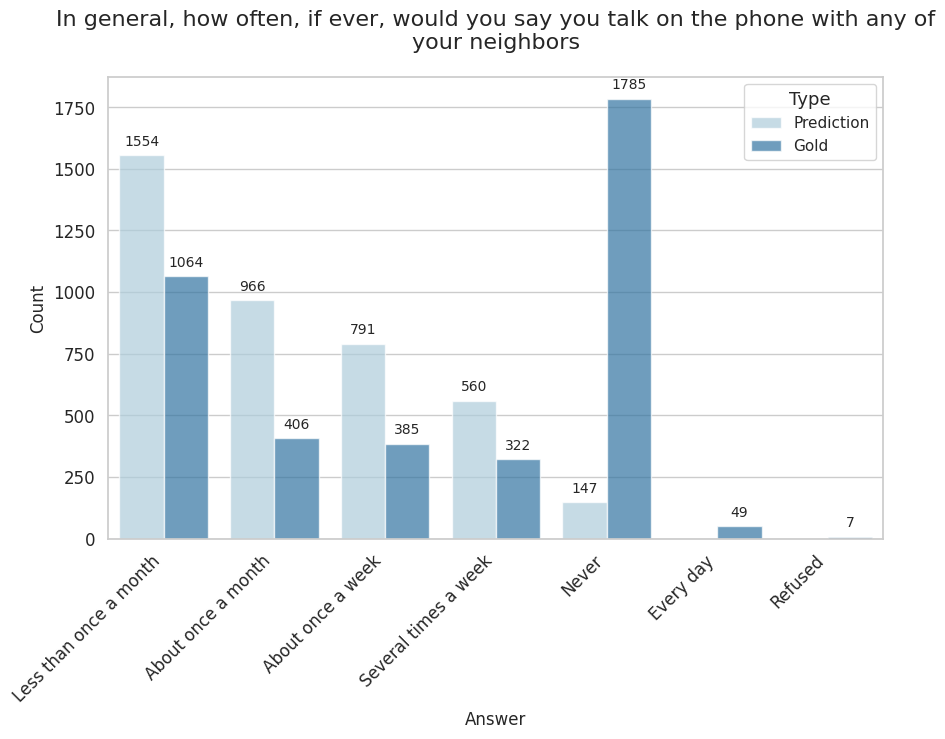

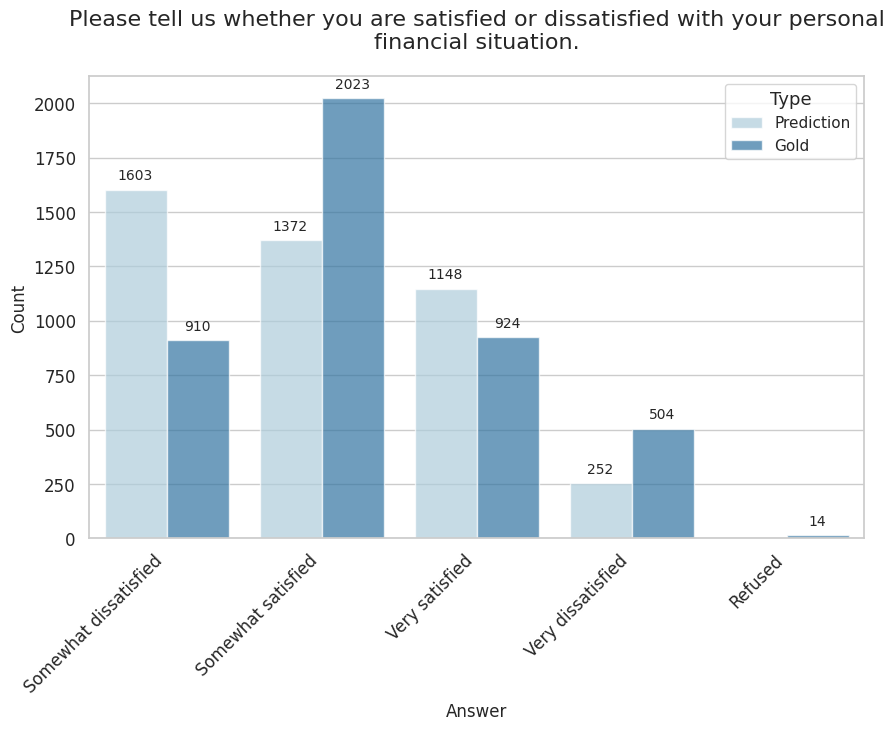

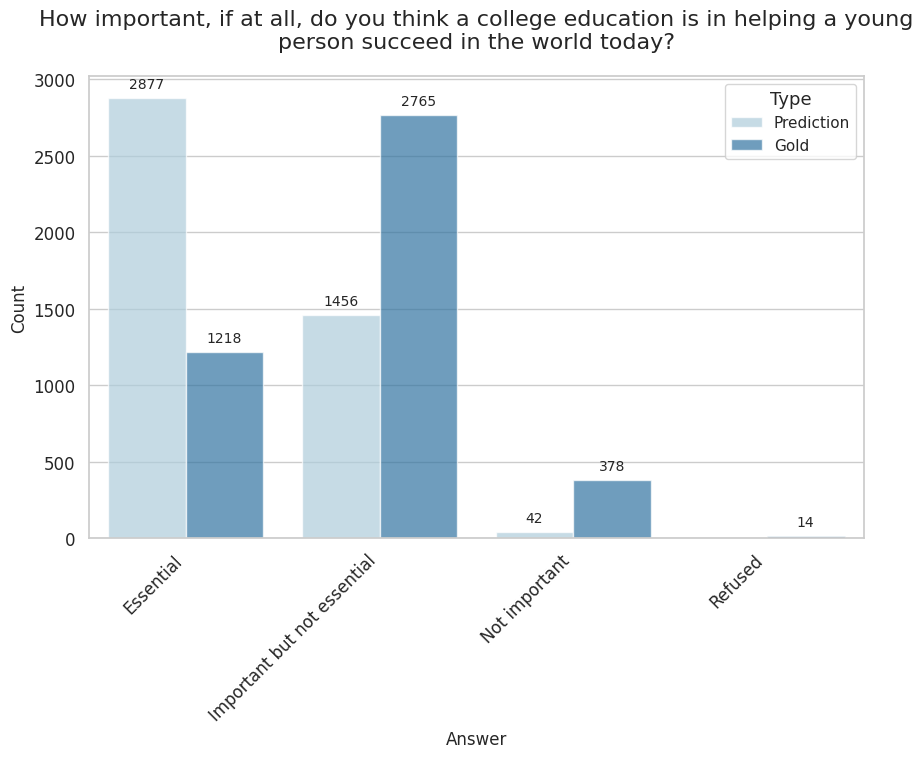

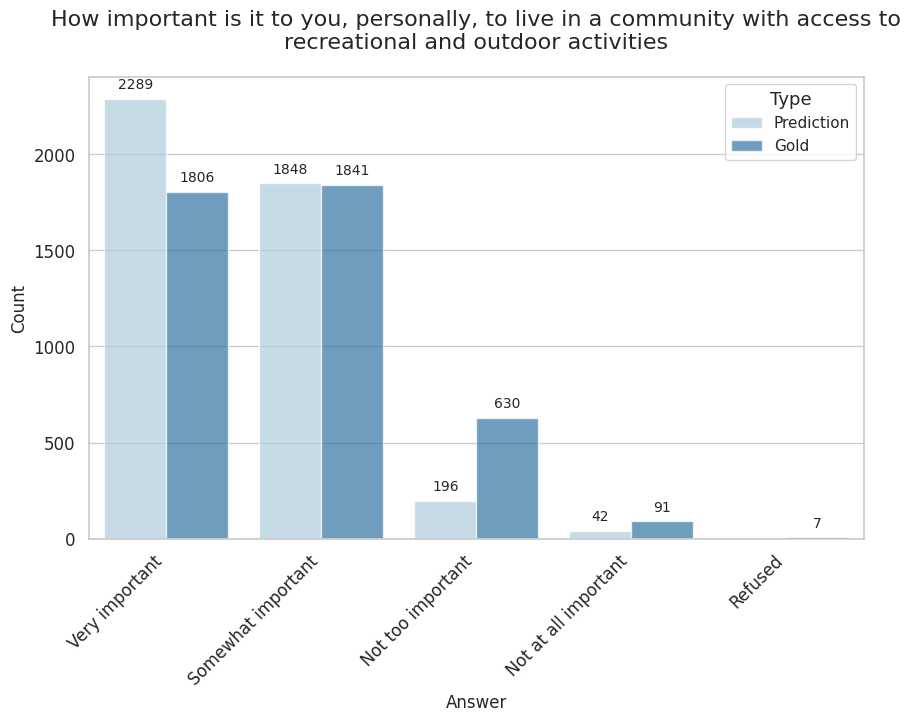

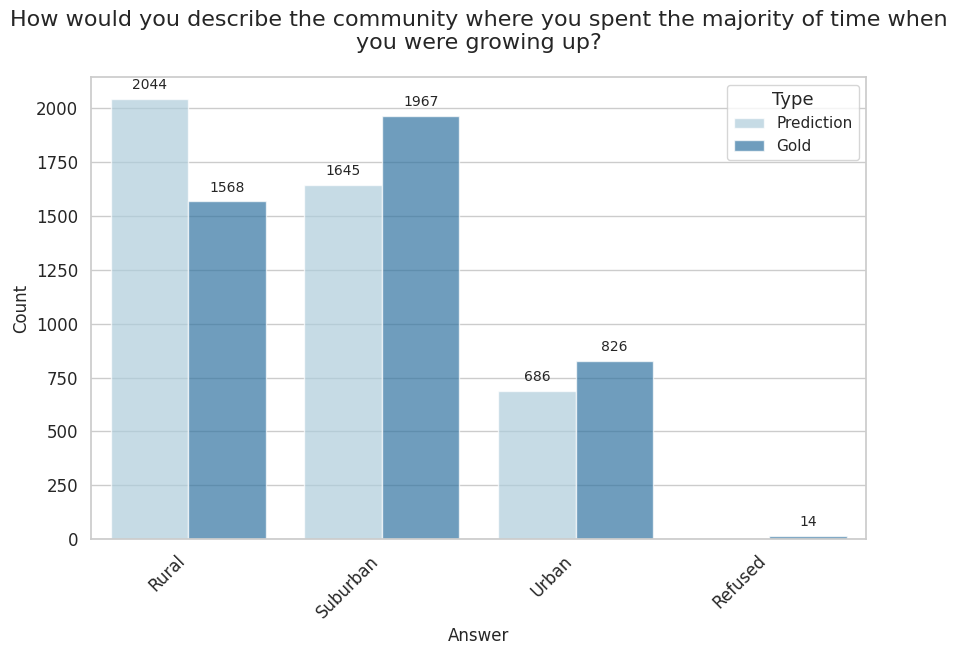

In [98]:
import textwrap
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
res = [{"pred": [], "gold": []} for _ in range(5)]
for filename in os.listdir(f'opinions_qa/output/{survey_name}'):

    with open(f"opinions_qa/output/{survey_name}/{viz_filename}", 'r') as f:
        data = json.load(f)

    for entry in data:
        q_idx = entry['q_idx']
        prediction = entry['prediction']
        gold_answer = entry['gold_answer']
        res[q_idx]['pred'].append(prediction)
        res[q_idx]['gold'].append(gold_answer)



# Create dataframes for visualization
dataframes = []
for i in range(5):
    df_pred = pd.Series(res[i]['pred']).value_counts().reset_index()
    df_pred.columns = ['Answer', 'Count']
    df_pred['Type'] = 'Prediction'
    df_pred['Question'] = f'Question {i+1}'
    
    df_gold = pd.Series(res[i]['gold']).value_counts().reset_index()
    df_gold.columns = ['Answer', 'Count']
    df_gold['Type'] = 'Gold'
    df_gold['Question'] = f'Question {i+1}'
    
    dataframes.append(pd.concat([df_pred, df_gold]))

# Plotting
sns.set(style="whitegrid")

# Function to plot the data
def plot_question(df, question_idx):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x="Answer", y="Count", hue="Type", palette=["#a6cee3", "#1f78b4"], alpha=0.7)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points',
                        fontsize=10)
    wrapped_title = "\n".join(textwrap.wrap(q_texts[question_idx], width=80))
    plt.title(wrapped_title, fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Answer', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Type', title_fontsize='13', fontsize='11')
    plt.show()

# Draw the graphs one by one
for i in range(5):
    plot_question(dataframes[i], i)
